In [1]:
### this program will predict flood of a particular water water shed using machine learning.

In [2]:
### first we will import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### we then lood our daily rainfall data and check the first 5 instances by calling the method head. The data was downlaoded from github
rain_data  = pd.read_csv(r"C:\Users\USER\Downloads\Hoppers Crossing-Hourly-Rainfall.csv")
rain_data.head(5)


,Date/Time,Current rainfall (mm),Cumulative rainfall (mm)
0,2018-12-02 18:00:00,0.0,0.0
1,2018-12-02 17:00:00,0.0,0.0
2,2018-12-02 16:00:00,0.0,0.0
3,2018-12-02 15:00:00,0.0,0.0
4,2018-12-02 14:00:00,0.0,0.0


In [4]:
### The dscribe method is used to describe check the decsriptive stastitics of the data
rain_data.describe()

,Current rainfall (mm),Cumulative rainfall (mm)
count,78844.000000,78847.000000
mean,0.049206,0.586580
std,0.765296,2.770216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


In [5]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78848 entries, 0 to 78847
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 78848 non-null  object 
 1   Current rainfall (mm)     78844 non-null  float64
 2   Cumulative rainfall (mm)  78847 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.8+ MB


In [6]:
rain_data.shape

(78848, 3)

In [7]:
### we then upload the river and check its first five instances
river_data = pd.read_csv(r"C:\Users\USER\Downloads\Hoppers Crossing-Hourly-River-Level.csv")

In [8]:
river_data.describe()

,Level (m)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


In [9]:
rain_river_data = pd.merge(rain_data,river_data, how = 'outer', on = ['Date/Time'])

In [10]:
rain_river_data. head(5)

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


In [11]:
rain_river_data['Cumulative rainfall (mm)'] =  rain_river_data['Cumulative rainfall (mm)'].fillna(0)
rain_river_data['Level (m)'] =  rain_river_data['Level (m)'].fillna(0)


In [12]:
rain_river_data.shape

(78850, 4)

In [13]:
rain_river_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78850 entries, 0 to 78849
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date/Time                 78850 non-null  object 
 1   Current rainfall (mm)     78844 non-null  float64
 2   Cumulative rainfall (mm)  78850 non-null  float64
 3   Level (m)                 78850 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.4+ MB


In [14]:
rain_river_data.head(5)

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,0.00
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


In [15]:
rain_river_data = rain_river_data.drop(columns = ['Date/Time','Current rainfall (mm)' ])

In [16]:
rain_river_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78850 entries, 0 to 78849
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cumulative rainfall (mm)  78850 non-null  float64
 1   Level (m)                 78850 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [17]:
rain_river_data.shape
rain_river_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78850 entries, 0 to 78849
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cumulative rainfall (mm)  78850 non-null  float64
 1   Level (m)                 78850 non-null  float64
dtypes: float64(2)
memory usage: 1.2 MB


In [18]:
rain_river_data.head(5)

,Cumulative rainfall (mm),Level (m)
0,0.0,0.00
1,0.0,1.61
2,0.0,1.61
3,0.0,1.62
4,0.0,1.63


In [19]:
x = rain_river_data.iloc[:,:1].values
y= rain_river_data.iloc[:,1:2].values

<Axes: xlabel='Cumulative rainfall (mm)', ylabel='Level (m)'>

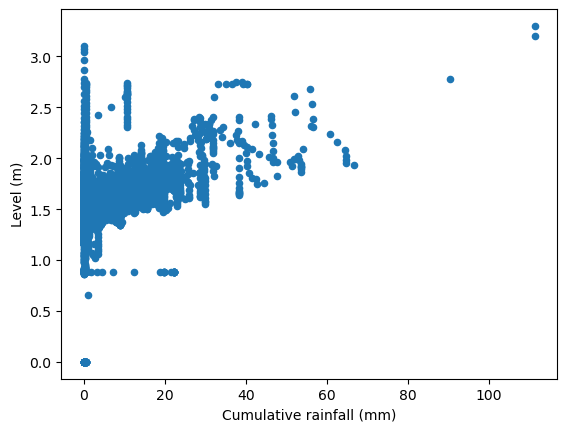

In [20]:
rain_river_data.plot(kind = "scatter",x = "Cumulative rainfall (mm)",y = "Level (m)")

In [21]:
corr_matrix = rain_river_data.corr()

In [22]:
corr_matrix["Cumulative rainfall (mm)"].sort_values(ascending=False)

Cumulative rainfall (mm)    1.000000
Level (m)                   0.406868
Name: Cumulative rainfall (mm), dtype: float64

In [23]:
print(x)
print (y)

[[0. ]
 [0. ]
 [0. ]
 ...
 [0.2]
 [0.2]
 [0.2]]
[[0.  ]
 [1.61]
 [1.61]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict = regressor.predict(x_test)

In [27]:
print(y_predict)

[[1.44348876]
 [1.44348876]
 [1.44348876]
 ...
 [1.44348876]
 [1.58613007]
 [1.44348876]]


In [28]:
print(y_test)

[[1.49]
 [1.47]
 [1.41]
 ...
 [1.39]
 [1.55]
 [1.41]]


In [29]:
>>> from sklearn.metrics import mean_squared_error
>>> lin_mse = mean_squared_error(y_test,y_predict)
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse


0.10462263915424863

In [30]:
def predict_flood(rainfall_list):
    # Assuming you have a trained regressor (e.g., from scikit-learn)
    rainfall_2d = np.array(rainfall_list).reshape(-1, 1)
    
    predictions = regressor.predict(rainfall_2d)
    
    for rain, prediction in zip(rainfall_list, predictions):
        if prediction > 1.8:
            print(f"Flood predicted for rainfall {rain}.")
        else:
            print(f"No flood expected for rainfall {rain}.")
    
    return predictions


In [31]:
predict_flood([10])

No flood expected for rainfall 10.


array([[1.61329984]])

In [32]:
 from sklearn.tree import DecisionTreeRegressor
 tree_reg = DecisionTreeRegressor()
 tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
 >>> river_level_predict = tree_reg.predict(x_test)
 >>> tree_mse = mean_squared_error(y_test, river_level_predict)
 >>> tree_rmse = np.sqrt(tree_mse)
 >>> tree_rmse

0.10383830816607954

In [34]:
(lin_rmse-tree_rmse)


0.000784330988169088

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
 >>> from sklearn.ensemble import RandomForestRegressor
 >>> forest_reg = RandomForestRegressor()
 forest_reg = forest_reg.fit(x_train,y_train)
scores = cross_val_score(forest_reg, x_train, y_train,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
print(forest_rmse_scores)

C:\Users\USER\AppData\Local\Temp\ipykernel_5864\111738120.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(x_train,y_train)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

[0.11180365 0.1036622  0.11115687 0.09883529 0.1018222  0.10903033
 0.10367865 0.10299604 0.10403119 0.10315815]


In [45]:
def predict_flood(rainfall_list):
    rainfall_2d = np.array(rainfall_list).reshape(-1, 1)
    
    predictions = forest_reg.predict(rainfall_2d)
    
    for rain, prediction in zip(rainfall_list, predictions):
        if prediction > 1.8:
            print(f"Flood predicted for rainfall {rain}.")
        else:
            print(f"No flood expected for rainfall {rain}.")
    
    return predictions


In [49]:
predict_flood([40])

Flood predicted for rainfall 40.


array([2.03484429])

In [60]:
import pickle
pickle.dump(predict_flood,open('predict_flood.pkl','wb'))

In [61]:
pickled_model = pickle.load(open('predict_flood.pkl','rb'))

In [63]:
pickled_model([40])

Flood predicted for rainfall 40.


array([2.03484429])